Cross Product Approach

In [1]:
import serial
import serial.tools
import serial.tools.list_ports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

# Serial Setup

In [2]:
ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: '{port.device}' - {port.description}")

Port: '/dev/cu.debug-console' - n/a
Port: '/dev/cu.ZihuiAndysPowerbeatsPro' - n/a
Port: '/dev/cu.Bluetooth-Incoming-Port' - n/a
Port: '/dev/cu.usbmodem21101' - IOUSBHostDevice


In [3]:
ser = serial.Serial('/dev/cu.usbmodem21101', 9600, timeout=None)

In [4]:
def get_accelerometer_data():
    ser.reset_input_buffer()
    while True:
        try:
            data = ser.readline().decode('utf-8').strip()
            data_splitted = list(map(int, data.split(',')))
            
            if len(data_splitted) == 3:
                break
        except:
            pass
    return np.array(data_splitted)

# Vector Operations

In [5]:
def get_magnitude(vec):
    return np.sqrt(np.dot(vec, vec))

In [6]:
def get_unit_vector(vec):
    return vec / get_magnitude(vec)

In [7]:
def get_angle_btwn_vecs(vec1, vec2):
    vec1_h = get_unit_vector(vec1)
    vec2_h = get_unit_vector(vec2)
    
    return np.arccos(np.dot(vec1_h, vec2_h))

def to_degree(radian):
    return 180 * radian / np.pi

In [8]:
def projection(from_, to):
    to_h = get_unit_vector(to)
    return np.dot(from_, to_h) * to_h

In [9]:
def gram_schmidt(datum, vec):
    return get_unit_vector(vec - projection(vec, datum))

# Cross Product Approach

In [11]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1 = get_unit_vector(np.mean(datum_1_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


In [13]:
datum_2_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_2_arr.append(entry)
    
datum_2 = get_unit_vector(np.mean(datum_2_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


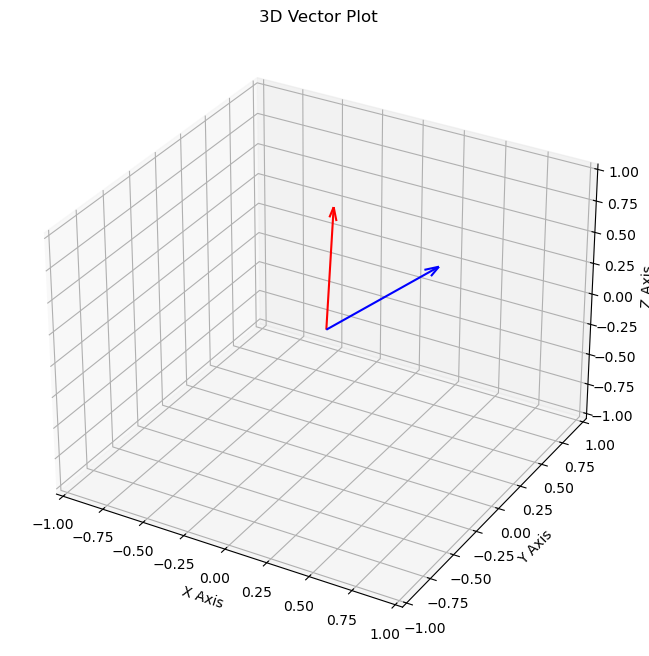

In [14]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Orthogonal Basis

In [15]:
p = projection(datum_2, datum_1)

In [16]:
datum_1_basis = datum_1
datum_2_basis = gram_schmidt(datum_1, datum_2)

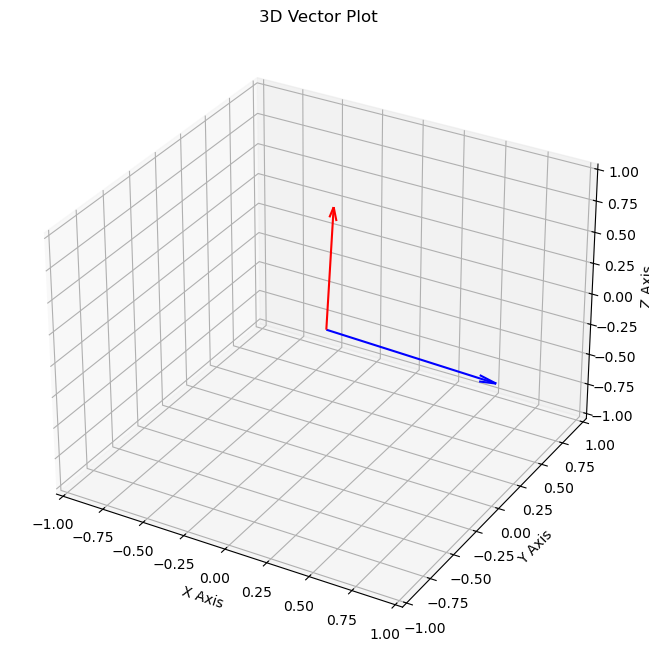

In [17]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Pitch Axis

In [18]:
pitch_axis = np.cross(datum_1_basis, datum_2_basis)

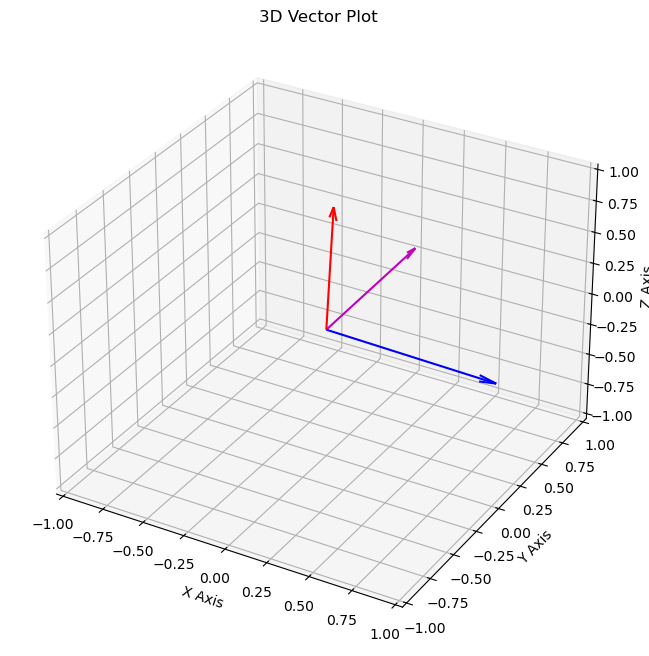

In [19]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *pitch_axis, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get more data

In [20]:
vec = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = get_unit_vector(np.mean(vec, axis=0))

100%|██████████| 20/20 [00:08<00:00,  2.25it/s]


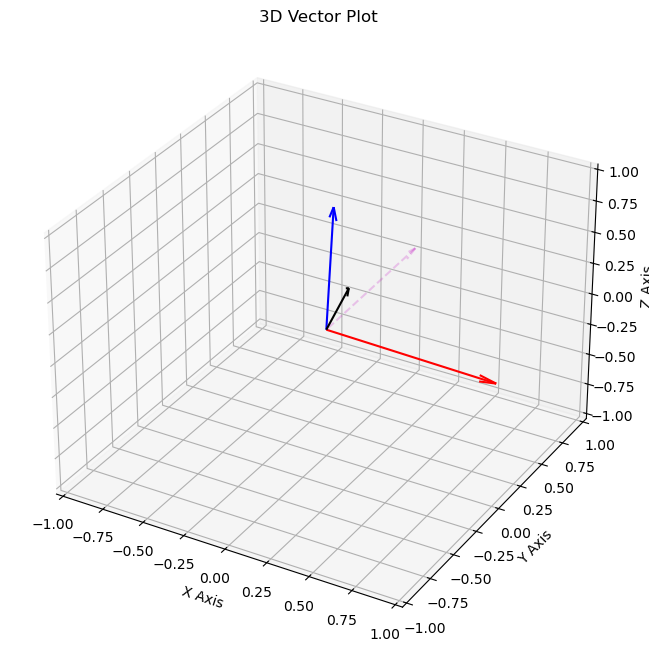

In [21]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *pitch_axis, color='m', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [22]:
vec_angle = np.cross(datum_1_basis, vec)

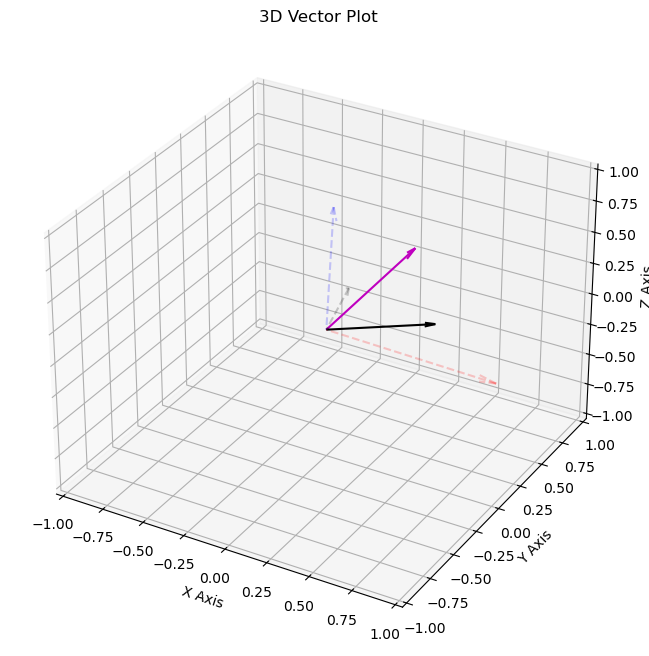

In [23]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='r', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *pitch_axis, color='m',  arrow_length_ratio=0.1)

ax.quiver(0, 0, 0, *vec, color='k', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec_angle, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [25]:
pitch_vec = projection(vec_angle, pitch_axis)

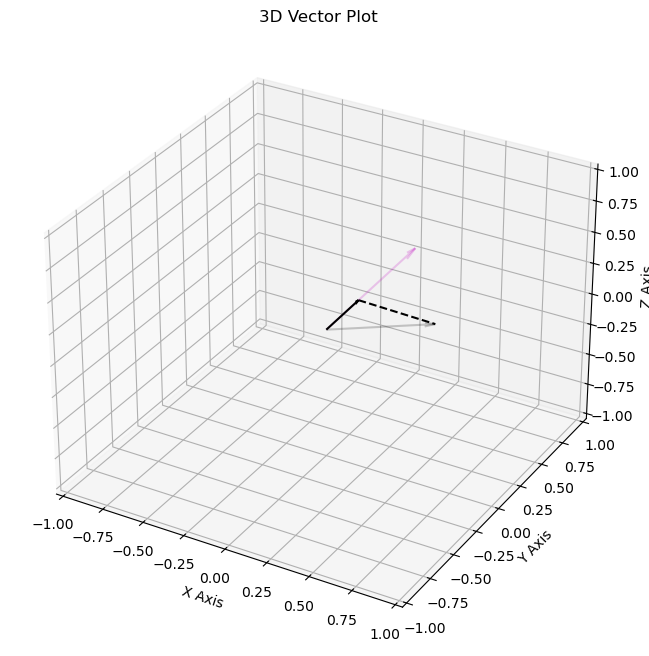

In [26]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *pitch_axis, color='m',  arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *vec_angle, color='k', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *pitch_vec, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(pitch_vec, vec_angle), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [27]:
to_degree(np.arcsin(np.dot(pitch_vec, pitch_axis)))

20.650076913141955

In [29]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    pitch_vec = projection(np.cross(datum_1_basis, vec), pitch_axis)
    print(f"angle = {to_degree(np.arcsin(np.dot(pitch_vec, pitch_axis)))}")
    

angle = 7.380633975176225
angle = -11.788285678855303
angle = -6.005447405102048
angle = -8.093739890187527
angle = 3.517643390241674
angle = 29.550716602714
angle = 50.72508065722469
angle = 72.66957853197414
angle = 82.30891237579675
angle = 81.84908250507857
angle = 82.40329268073981
angle = 80.84382643460134
angle = 81.37887620590685
angle = 82.1050223399812
angle = 79.09622255170844
angle = 69.30271829945913
angle = 62.761647938515786
angle = 51.54983191704494
angle = 48.639517494022606
angle = 47.57318176685546
angle = 44.17754711289232
angle = 41.142349804257215
angle = 41.32785860055496
angle = 39.58469567554055
angle = 41.84991868502269
angle = 42.34612086822183
angle = 84.23996846371861
angle = 28.33970250099048
angle = -12.33615183403047
angle = -55.152386702828416
angle = -72.2415393943443
angle = -81.24073748335346
angle = -79.38015120076498
angle = -74.19785278331192
angle = -77.20121153013831
angle = -82.0553563533079
angle = -63.707974350201155
angle = -41.5649679793546

In [30]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    pitch_vec = projection(np.cross(datum_1_basis, vec), pitch_axis)
    pitch_vec_A = projection(np.cross(datum_2_basis, vec), pitch_axis)
    angle = to_degree(np.arcsin(np.dot(pitch_vec, pitch_axis)))
    angle_A = to_degree(np.arcsin(np.dot(pitch_vec_A, pitch_axis)))
    
    if (angle_A > 0):
        if (angle > 0):
            print(f"angle = {180-angle}")
        else:
            print(f"angle = {-180-angle}")
    else:
        print(f"angle = {angle}")

angle = -0.10616012177272863
angle = -2.9682258430522106
angle = -0.22941580999505284
angle = 0.27838928695620824
angle = 0.6366038197749242
angle = 0.7233584079092158
angle = 0.38134887397811074
angle = -0.7185183174590349
angle = -0.3711215735818961
angle = -1.9970378309355683
angle = 14.272295655733142
angle = 57.8768054270711
angle = 58.28979897155379
angle = 29.33668779894516
angle = -1.6299237528337533
angle = -44.346040277385804
angle = -66.86196722059759
angle = -9.396954163415634
angle = 33.938226504344605
angle = 65.08807970210923
angle = 94.16018339194589
angle = 106.71360608641167
angle = 116.58022056861898
angle = 126.29625367567212
angle = 149.05669433132394
angle = 147.16884922199796
angle = 149.25749984832385
angle = 110.1398297494588
angle = 52.520362578946965
angle = -18.814886166014396
angle = -2.122755725325366
angle = -1.4710874358289323
angle = 0.6598702893429612
angle = 0.1775225384746439
angle = 2.38108584355088
angle = 0.020631343373929557
angle = 0.23792738592